## Red Wine Quality Prediction

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

In [270]:
#import all the required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING DATASET

In [245]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Data shows that it has 1599 rows and 12 columns.The data is about different parameters of the ingridients
present in wine which decides the quality of the wine.

### Exploratory Data Analysis

In [246]:
# check column names
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [247]:
# replacing the whitespace with underscore for convinience
wine.columns = wine.columns.str.replace(' ', '_')
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [248]:
# check number of columns and rows
wine.shape

(1599, 12)

In [249]:
#to check for null values
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the wine dataset.

In [250]:
# To check for duplicate values
wine.duplicated().sum()

240

There are 240 duplicate values in the dataset.

In [251]:
#dropping duplicate rows and resetting index
wine.drop_duplicates(inplace=True)
wine.reset_index(drop=True, inplace=True)
print('Number of rows after removing duplicates=', len(wine))

Number of rows after removing duplicates= 1359


In [252]:
# to understand dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


After removing duplicated values in the dataset we have 1359 rows and 12 columns. 

There are two data types - float and integer.

There are no null values.

In [253]:
# to understand the wine catagories
wine.quality.value_counts(sort=False)

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

The quality of wine is divided in six catagories ranging from 3-8, where 3 represent least quality and 8 represent best quality.

### visualization

[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

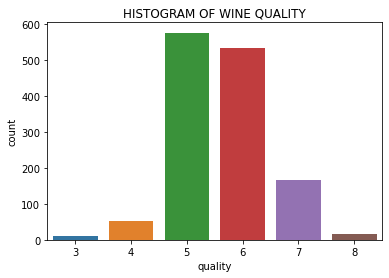

In [254]:
plt = sns.countplot(x='quality',data=wine)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

 Quality 5 and 6 have most number of observations where as,3 and 8 have least number of observations. 

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

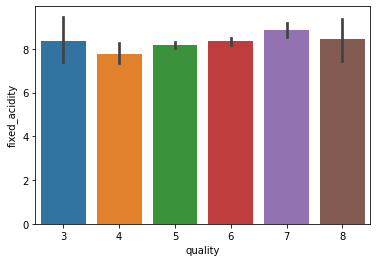

In [255]:
# to understand how each feature is effecting the target value(quality of wine).
sns.barplot(x='quality',y='fixed_acidity',data=wine)


Fixed acidity doesn't have any impact on the quality of wine 

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

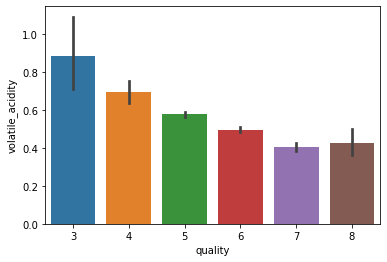

In [256]:
sns.barplot(x='quality',y='volatile_acidity',data=wine)

Volatile acidity has negitive relation with quality. 

Increase in volatile acidity will decrease the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

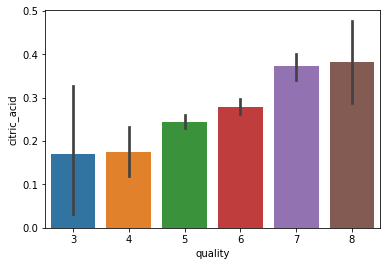

In [257]:
sns.barplot(x='quality',y='citric_acid',data=wine)

citric acid has positive relation with quality.

with increase in citric acid will increase the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

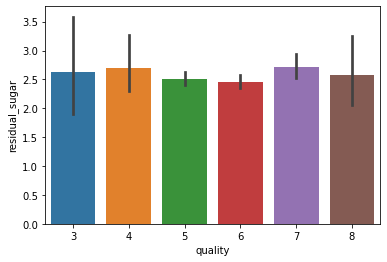

In [258]:
sns.barplot(x='quality',y='residual_sugar',data=wine)

Residual sugar have no impact on the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

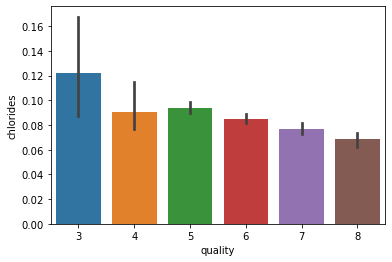

In [259]:
sns.barplot(x='quality',y='chlorides',data=wine)

chlorides has negitive relation with quality.

Increase in chlorides will decrease the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

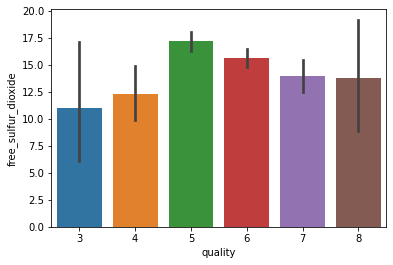

In [260]:
sns.barplot(x='quality',y='free_sulfur_dioxide',data=wine)

free sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

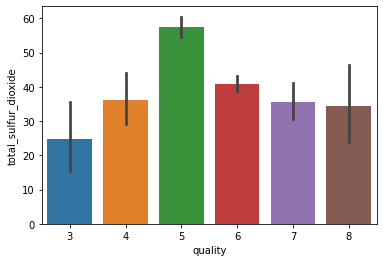

In [261]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=wine)

total sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

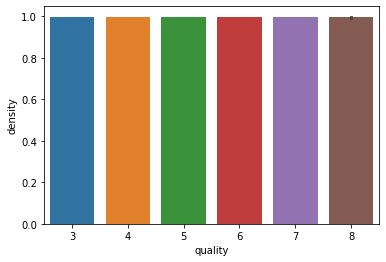

In [262]:
sns.barplot(x='quality',y='density',data=wine)

Density has no corelation with quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

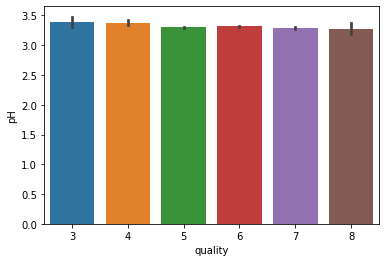

In [263]:
sns.barplot(x='quality',y='pH',data=wine)

pH has no corelation with quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

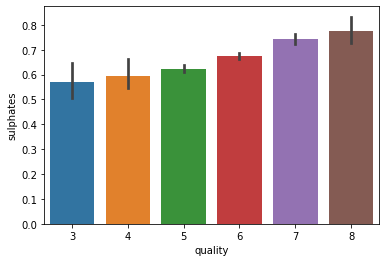

In [264]:
sns.barplot(x='quality',y='sulphates',data=wine)

With increase in sulphate quality is increased.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

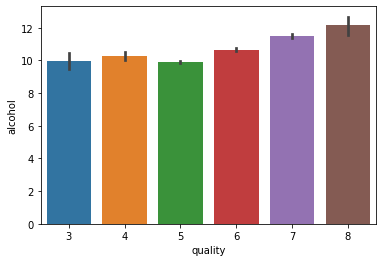

In [265]:
sns.barplot(x='quality',y='alcohol',data=wine)

With increase in alcohol quality will improve.

In [266]:
#to reduce the variation between each category of quality column, merge categories in to two
wine_quality = {3:'bad', 4:'bad',5:'bad',6:'bad',7:'good',8:'good'}
wine['quality2'] = wine.quality.map(wine_quality)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad


In [267]:
#to convert catagorical values in the quality2 in to numbers
le = LabelEncoder()
wine['quality2']=le.fit_transform(wine['quality2'])
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

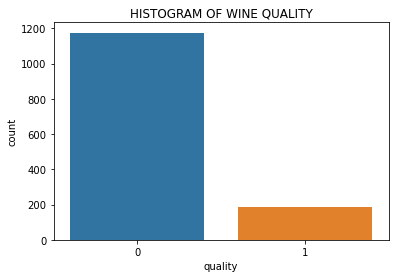

In [268]:
#to check value count of quality2
plt = sns.countplot(x='quality2',data=wine)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

Merged the six wine categories into two - 'no good' quality and 'good' quality.

Good quality is less than no good quality.

<AxesSubplot:>

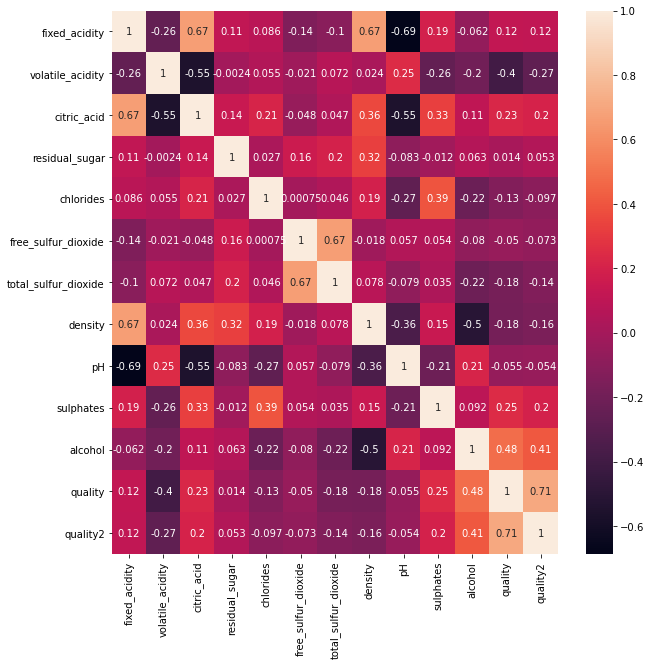

In [271]:
plt.figure(figsize = (10,10))
sns.heatmap(wine.corr(),color ='k',annot=True)

From above figure  we can conclude that 
1. Alcohol is most positively corelated among the other attributes with the quality.
2. volatile acidity is most negatively corelated among the other attributes with the quality.
3. residual sugar,free sulfur dioxide,pH have no corelation with the quality.

Visualization of correlation table.

In [272]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.116120
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.267344
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.203561
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.096806
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.072771
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.201551


### Data cleaning

In [273]:
# to drop quality column as it is converted in to quality2
# to save the dataframe in 'x'
x = wine.drop (['quality'], axis = 1)

In [275]:
x['quality2'].value_counts()

0    1175
1     184
Name: quality2, dtype: int64

In [151]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality2'],
      dtype='object')

In [152]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [153]:
np.unique(y,return_counts=True)

(array([0, 1]), array([1175,  184], dtype=int64))

In [154]:
#to check the skewness in the dataset
x.skew()

fixed_acidity           0.941041
volatile_acidity        0.729279
citric_acid             0.312726
residual_sugar          4.548153
chlorides               5.502487
free_sulfur_dioxide     1.226579
total_sulfur_dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality2                2.133662
dtype: float64

In [276]:
#to remove the skewness in the dataset
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [277]:
#creating new dataset after removing skewness and saving it to 'x'
x = pd.DataFrame(x_new , columns = x.columns)
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality2
0,-0.439412,0.978091,-1.530544,-0.602600,-0.166676,-0.269573,-0.128948,0.587781,1.277041,-0.582775,-1.068157,-0.395722
1,-0.161475,1.720040,-1.530544,0.560720,0.778512,0.992495,0.841796,0.054350,-0.695907,0.400130,-0.499290,-0.395722
2,-0.161475,1.242047,-1.256962,0.153076,0.557116,0.192377,0.530012,0.161294,-0.296058,0.188379,-0.499290,-0.395722
3,1.529010,-1.551503,1.389613,-0.602600,-0.219369,0.384096,0.681966,0.694083,-0.967619,-0.391438,-0.499290,-0.395722
4,-0.439412,0.791661,-1.530544,-0.844564,-0.219369,-0.023152,0.100926,0.587781,1.277041,-0.582775,-1.068157,-0.395722
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.903672,0.596149,-0.996743,-0.602600,-0.616834,1.176074,0.028175,-0.100946,0.727244,1.169880,-0.916248,-0.395722
1355,-1.436385,0.494776,-0.996743,-0.384706,0.477791,1.395040,0.236575,-0.968055,0.912498,-0.391438,0.286561,-0.395722
1356,-1.733557,0.230050,-0.871292,-0.009276,-1.001198,1.724577,0.447853,-0.849072,1.337040,0.878488,0.875408,-0.395722
1357,-1.733557,0.719444,-0.748774,-0.384706,-0.219369,1.395040,0.236575,-0.660104,1.633860,0.593171,-0.021928,-0.395722


In [278]:
#to check the skewness in the dataset after applying power transformation
x.skew()

fixed_acidity           0.001884
volatile_acidity        0.008311
citric_acid             0.016563
residual_sugar         -0.001715
chlorides              -0.061923
free_sulfur_dioxide    -0.009899
total_sulfur_dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
quality2                2.133662
dtype: float64

In [280]:
#to check if skweness is lying between -0.5 to 0.5
x.skew()[np.abs(x.skew()) < 0.5].all()

True

In [281]:
len(x)

1359

fixed_acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile_acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric_acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual_sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free_sulfur_dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total_sulfur_dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality2                AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

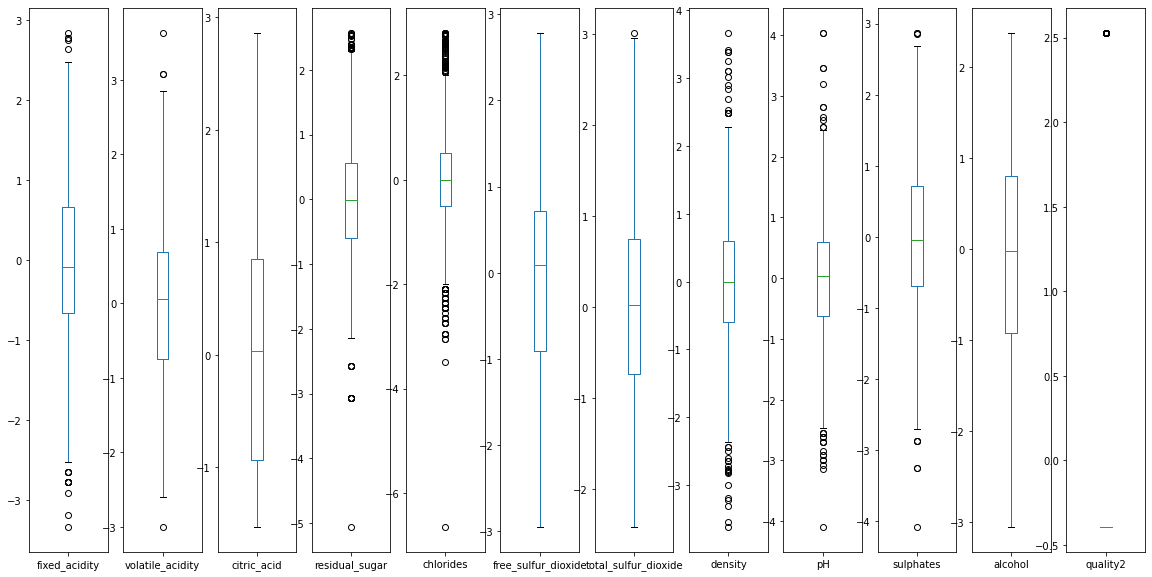

In [282]:
# to find out outliers in the dataset
x.plot(kind='box',subplots=True,figsize=(20,10))

In [283]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(x)) < 3).all()

False

In [284]:
#to remove outliers in data set through zscore
z = np.abs(zscore(x))
z.shape

(1359, 12)

In [285]:
threshold = 3
print(np.where(z>3))

(array([   6,   41,   41,   87,   87,  114,  115,  135,  151,  175,  385,
        410,  420,  450,  473,  473,  483,  485,  528,  534,  602,  602,
        689,  722,  722,  764,  779,  810,  866,  866,  920,  948, 1081,
       1082, 1097, 1106, 1121, 1121, 1125, 1125, 1161, 1165, 1216, 1250,
       1333], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  3,  7, 10,  8, 10,  7,
        7,  7,  8,  4,  8,  4,  4,  7,  7,  3,  1,  3,  7,  6,  7,  7,  7,
        9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4], dtype=int64))


In [286]:
x_new = x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(1359, 12)
(1322, 12)


In [287]:
#to find % loss in data
loss = (1359-1322)/1359 * 100
print(loss)

2.7225901398086827


fixed_acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile_acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric_acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual_sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free_sulfur_dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total_sulfur_dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality2                AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

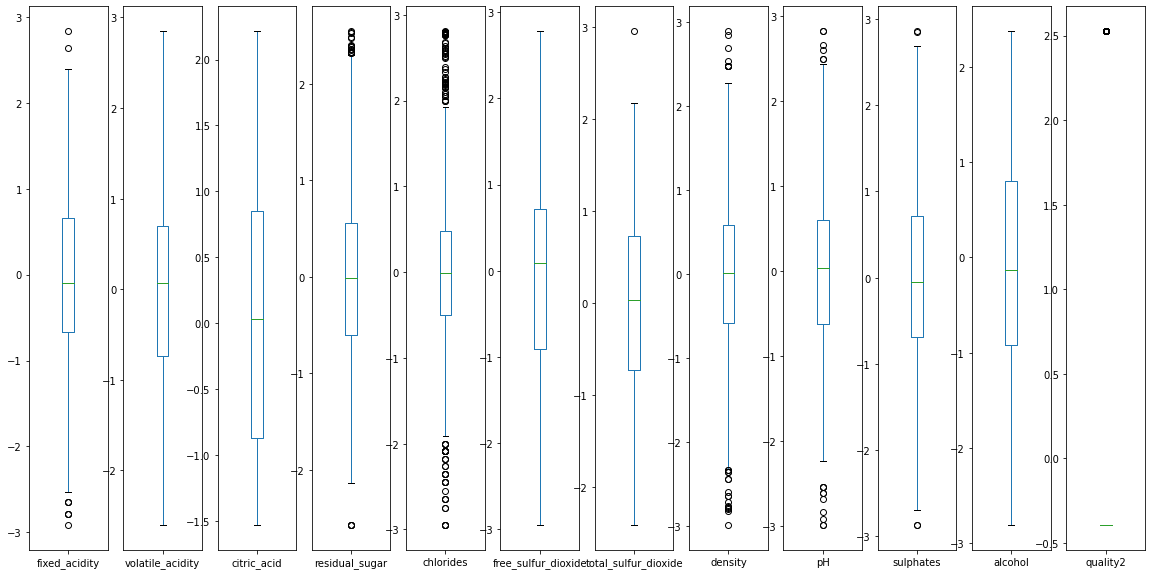

In [288]:
# visualization for outliers after using zscore
x_new.plot(kind='box',subplots=True,figsize=(20,10))

In [289]:
#seperate feature variable and target variable
x = x_new.drop (['quality2'], axis = 1)
y = x_new['quality2']

In [290]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [291]:
y

0      -0.395722
1      -0.395722
2      -0.395722
3      -0.395722
4      -0.395722
          ...   
1354   -0.395722
1355   -0.395722
1356   -0.395722
1357   -0.395722
1358   -0.395722
Name: quality2, Length: 1322, dtype: float64

In [292]:
#to convert y in to integer
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model making

In [340]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,1322):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)
    

Best accuracy is 0.9320754716981132 on Random_State 587


In [341]:
#spliting dataset into training(80%) and testing(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [342]:
# to check shape after spliting
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (1057, 11)
shape of y_train: (1057, 11)
shape of x_test: (265, 11)
shape of y_test: (265,)


#### LogisticReression

In [343]:
#build a logistic regression classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 93.20754716981132
[[229   9]
 [  9  18]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       238
           1       0.67      0.67      0.67        27

    accuracy                           0.93       265
   macro avg       0.81      0.81      0.81       265
weighted avg       0.93      0.93      0.93       265



#### Random Forest Model

In [344]:
#build a RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train, y_train)
predlr = RF.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 91.69811320754717
[[227  11]
 [ 11  16]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       238
           1       0.59      0.59      0.59        27

    accuracy                           0.92       265
   macro avg       0.77      0.77      0.77       265
weighted avg       0.92      0.92      0.92       265



#### Decision Tree Model

In [345]:
# build a DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)
predlr = DT.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 84.90566037735849
[[213  25]
 [ 15  12]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       238
           1       0.32      0.44      0.38        27

    accuracy                           0.85       265
   macro avg       0.63      0.67      0.64       265
weighted avg       0.87      0.85      0.86       265



#### Standard Vector Machine Model

In [346]:
#build a SVC model
svc=SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print('accuracy',accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

accuracy 92.83018867924528
[[232   6]
 [ 13  14]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.70      0.52      0.60        27

    accuracy                           0.93       265
   macro avg       0.82      0.75      0.78       265
weighted avg       0.92      0.93      0.92       265



In [347]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(LR,x,y,cv=None).mean())
print('cross validation score of desicion tree model = ', cross_val_score(DT,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())

cross validation score of random forest model =  0.8721726700971985
cross validation score of logistic regression model =  0.8759519725557462
cross validation score of desicion tree model =  0.810863350485992
cross validation score of standard vector machine model =  0.8729331046312179


#### Hyper parameter tuning

In [348]:
#parameters of LogisticRegression
parameter= { 'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']}

In [349]:
gcv = GridSearchCV(LogisticRegression(random_state=587), parameter, verbose=1, cv=10, n_jobs=-1)

In [350]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=587), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [351]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'class_weight': 'balanced', 'max_iter': 20, 'solver': 'newton-cg'}

In [352]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [353]:
# finding best estimator
gcv.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=20, random_state=587,
                   solver='newton-cg')

In [354]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

80.75471698113208


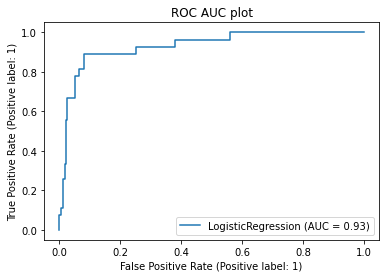

In [355]:
#ploting ROC and AUC curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

### Final model has 93% accuracy

In [357]:
# saving the model
import joblib
joblib.dump(final_model,'FinalModel_wine_quality.pkl')

['FinalModel_wine_quality.pkl']